This is the final model of CNN and VGG16. you can find initial draft models from trials folder. The code is generated by our group members, materials from the class, stackoverflow, google search.

In [ ]:
# import libraries
import os
import cv2
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras import Model

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras import utils, optimizers, callbacks
from keras.utils import to_categorical
from keras.layers import BatchNormalization, Activation
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.optimizers.schedules import PiecewiseConstantDecay
from keras.callbacks import EarlyStopping
#from keras_tuners import RandomSearch

from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.layers import Dense, GlobalAveragePooling2D

from keras.callbacks import ModelCheckpoint, TensorBoard


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
good_folder = '/content/drive/MyDrive/Neural Network And Deep Learning/validation_thumbnails/'
bad_folder = '/content/drive/MyDrive/Neural Network And Deep Learning/bad/'


df = pd.DataFrame(columns=['Image_Path', 'Label'])

# Load "good" images and label them as "good"
good_images = os.listdir(good_folder)
df_good = pd.DataFrame({'Image_Path': [os.path.join(good_folder, img) for img in good_images],
                        'Label': 'good'})
df = pd.concat([df, df_good])

# Load "bad" images and label them as "bad"
bad_images = os.listdir(bad_folder)
df_bad = pd.DataFrame({'Image_Path': [os.path.join(bad_folder, img) for img in bad_images],
                       'Label': 'bad'})
df = pd.concat([df, df_bad])

print(df.head())


                                          Image_Path Label
0  /content/drive/MyDrive/Neural Network And Deep...  good
1  /content/drive/MyDrive/Neural Network And Deep...  good
2  /content/drive/MyDrive/Neural Network And Deep...  good
3  /content/drive/MyDrive/Neural Network And Deep...  good
4  /content/drive/MyDrive/Neural Network And Deep...  good


# CNN

Initial Modeling for training good and bad Youtube thumbnails

In [ ]:
def preprocess_image(image_path, target_size=(224, 224)):

    image = cv2.imread(image_path)


    image = cv2.resize(image, target_size)


    image = image.astype('float32') / 255.0

    return image


df_train_subsampled = df.sample(n=1000, random_state=42)


df_train_subsampled['Processed_Image'] = df_train_subsampled['Image_Path'].apply(preprocess_image)


label_encoder = LabelEncoder()
df_train_subsampled['Encoded_Label'] = label_encoder.fit_transform(df_train_subsampled['Label'])


X_train_subsampled, X_val_subsampled, y_train_subsampled, y_val_subsampled = train_test_split(
    np.array(df_train_subsampled['Processed_Image'].tolist()),
    df_train_subsampled['Encoded_Label'],
    test_size=0.2,
    random_state=42
)


print(f"X_train_subsampled shape: {X_train_subsampled.shape}, y_train_subsampled shape: {y_train_subsampled.shape}")
print(f"X_val_subsampled shape: {X_val_subsampled.shape}, y_val_subsampled shape: {y_val_subsampled.shape}")


def build_and_compile_model(input_shape=(224, 224, 3), num_classes=1):

    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='sigmoid'))


    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model


model = build_and_compile_model()


r =model.fit(X_train_subsampled, y_train_subsampled, epochs=20, batch_size=32, validation_data=(X_val_subsampled, y_val_subsampled))


X_train_subsampled shape: (800, 224, 224, 3), y_train_subsampled shape: (800,)
X_val_subsampled shape: (200, 224, 224, 3), y_val_subsampled shape: (200,)
Epoch 1/20
25/25 [==============================] - 4s 99ms/step - loss: 2.8156 - accuracy: 0.6075 - val_loss: 0.6919 - val_accuracy: 0.6850
Epoch 2/20
25/25 [==============================] - 2s 87ms/step - loss: 0.6312 - accuracy: 0.7200 - val_loss: 0.6185 - val_accuracy: 0.7000
Epoch 3/20
25/25 [==============================] - 2s 86ms/step - loss: 0.4946 - accuracy: 0.7675 - val_loss: 0.5185 - val_accuracy: 0.7400
Epoch 4/20
25/25 [==============================] - 2s 88ms/step - loss: 0.3750 - accuracy: 0.8487 - val_loss: 0.5214 - val_accuracy: 0.7500
Epoch 5/20
25/25 [==============================] - 2s 83ms/step - loss: 0.3010 - accuracy: 0.8900 - val_loss: 0.5618 - val_accuracy: 0.7050
Epoch 6/20
25/25 [==============================] - 2s 83ms/step - loss: 0.1964 - accuracy: 0.9375 - val_loss: 0.6065 - val_accuracy: 0.7700


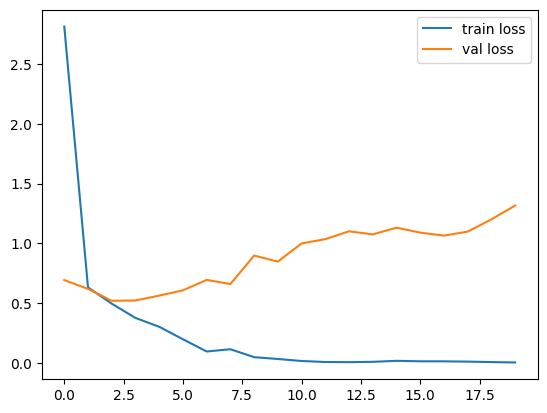

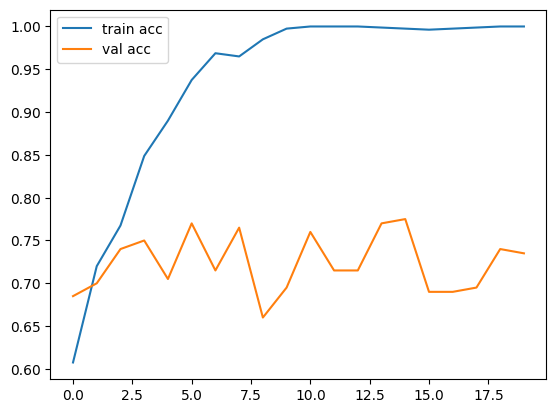

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
folder_path = '/content/drive/MyDrive/Neural Network And Deep Learning/good_thumbnails/'


file_list = os.listdir(folder_path)


for file_name in file_list:

    image_path = os.path.join(folder_path, file_name)


    test_image = preprocess_image(image_path)


    test_image = np.expand_dims(test_image, axis=0)


    predictions = model.predict(test_image)

    predicted_label = label_encoder.inverse_transform([round(predictions[0][0])])[0]

    print(f'Image: {file_name}, Predicted Label: {predicted_label}')


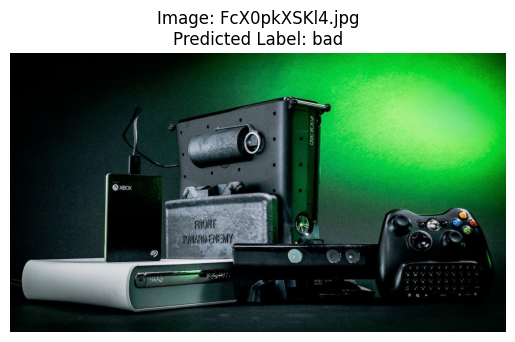

In [ ]:
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title(f'Image: {file_name}\nPredicted Label: {predicted_label}')
plt.axis('off')
plt.show()

In [ ]:
new_data_folder = '/content/drive/MyDrive/Neural Network And Deep Learning/good_thumbnails/'


def preprocess_image_for_prediction(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    image = image.astype('float32') / 255.0
    return image


new_data_images = [f for f in os.listdir(new_data_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]


model = build_and_compile_model()


predictions = []

for image_file in new_data_images:
    image_path = os.path.join(new_data_folder, image_file)
    processed_image = preprocess_image_for_prediction(image_path)
    processed_image = np.expand_dims(processed_image, axis=0)
    prediction = model.predict(processed_image)
    predictions.append({'image_file': image_file, 'prediction': prediction[0][0]})

for result in predictions:
    print(f"Image: {result['image_file']}, Prediction: {result['prediction']}")

advacned model - added learning rate and early stopping

In [ ]:
def preprocess_image_for_prediction(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    image = image.astype('float32') / 255.0
    return image



df_train_subsampled = df.sample(n=1000, random_state=42)


df_train_subsampled['Processed_Image'] = df_train_subsampled['Image_Path'].apply(preprocess_image_for_prediction)


label_encoder = LabelEncoder()
df_train_subsampled['Encoded_Label'] = label_encoder.fit_transform(df_train_subsampled['Label'])


X_train_subsampled, X_val_subsampled, y_train_subsampled, y_val_subsampled = train_test_split(
    np.array(df_train_subsampled['Processed_Image'].tolist()),
    df_train_subsampled['Encoded_Label'],
    test_size=0.2,
    random_state=42
)

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Build a model with improved architecture
def build_and_compile_model(input_shape=(224, 224, 3), num_classes=1):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    #model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model


model = build_and_compile_model()

# Model callbacks
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=1)

# Train the model with data augmentation
history = model.fit(
    train_datagen.flow(X_train_subsampled, y_train_subsampled, batch_size=12),
    epochs=20,
    validation_data=(X_val_subsampled, y_val_subsampled),
    #callbacks=[early_stopping, model_checkpoint, tensorboard]
    callbacks=[model_checkpoint, tensorboard]
)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_val_subsampled, y_val_subsampled)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


# vgg 16

In [ ]:
good_train_data_dir = '/content/drive/MyDrive/Neural Network And Deep Learning/validation_thumbnails/'
bad_train_data_dir = '/content/drive/MyDrive/Neural Network And Deep Learning/bad/'
random_test_data_dir = '/content/drive/MyDrive/Neural Network And Deep Learning/good_thumbnails/'

In [ ]:
# Subsample
subsample_size = 1000

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


good_images = []
good_labels = []

for filename in os.listdir(good_train_data_dir):
    img = cv2.imread(os.path.join(good_train_data_dir, filename))
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    good_images.append(img)
    good_labels.append(1)

bad_images = []
bad_labels = []

for filename in os.listdir(bad_train_data_dir):
    img = cv2.imread(os.path.join(bad_train_data_dir, filename))
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    bad_images.append(img)
    bad_labels.append(0)


good_images = np.array(good_images)
good_labels = np.array(good_labels)
bad_images = np.array(bad_images)
bad_labels = np.array(bad_labels)


all_images = np.concatenate([good_images, bad_images])
all_labels = np.concatenate([good_labels, bad_labels])


X_train, X_val, y_train, y_val = train_test_split(
    all_images, all_labels, test_size=0.2, random_state=42)



In [ ]:
random_test_images = []
random_test_labels = []

for filename in os.listdir(random_test_data_dir):
    img = cv2.imread(os.path.join(random_test_data_dir, filename))
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    random_test_images.append(img)
    random_test_labels.append(0.5)

random_test_images = np.array(random_test_images)
random_test_labels = np.array(random_test_labels)

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


r2 = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(random_test_images, random_test_labels)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

58889256/58889256 [==============================] - 3s 0us/step
Epoch 1/20
43/43 [==============================] - 50s 624ms/step - loss: 0.9729 - accuracy: 0.6994 - val_loss: 0.6722 - val_accuracy: 0.5279
Epoch 2/20
43/43 [==============================] - 18s 414ms/step - loss: 0.6194 - accuracy: 0.7133 - val_loss: 0.6284 - val_accuracy: 0.7214
Epoch 3/20
43/43 [==============================] - 18s 426ms/step - loss: 0.5735 - accuracy: 0.7397 - val_loss: 0.5560 - val_accuracy: 0.7214
Epoch 4/20
43/43 [==============================] - 18s 424ms/step - loss: 0.5539 - accuracy: 0.7412 - val_loss: 0.5785 - val_accuracy: 0.7214
Epoch 5/20
43/43 [==============================] - 18s 419ms/step - loss: 0.5572 - accuracy: 0.7405 - val_loss: 0.5323 - val_accuracy: 0.7390
Epoch 6/20
43/43 [==============================] - 18s 419ms/step - loss: 0.5400 - accuracy: 0.7346 - val_loss: 0.5427 - val_accuracy: 0.7302
Epoch 7/20
43/43 [==============================] - 18s 422ms/step - loss: 0.

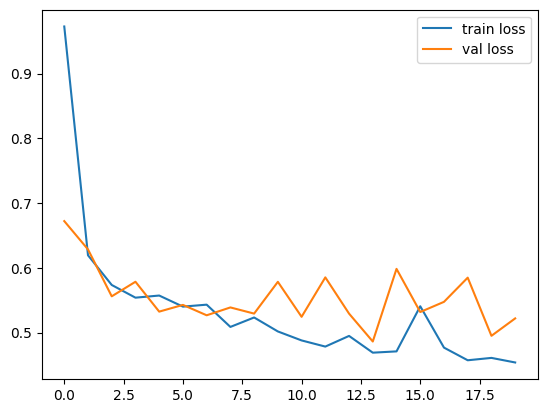

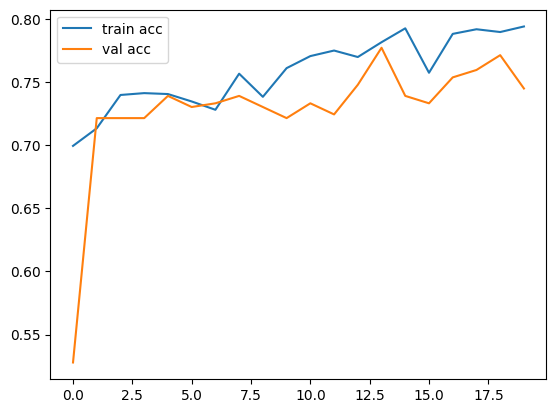

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.plot(r2.history['loss'], label='train loss')
plt.plot(r2.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


plt.plot(r2.history['accuracy'], label='train acc')
plt.plot(r2.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')